# Quality control line2line interp

1. compare historic radarlines to modern (lineAPREScross)
2. Compare interpd surface to REMA
3. compare interpd thickness to historic lines

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import time
import datetime as dt
import pandas as pd
import geopandas as gpd
import scipy as sp
from scipy import signal
from tqdm.notebook import tqdm
from mpl_toolkits import mplot3d
import rasterio as rio

from shapely.geometry import Point, LineString, Polygon, MultiPoint
import fiona
from shapely.ops import nearest_points

# 1. compare historic radarlines to modern

In [3]:
new_gpr = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/picked_bed.shp')
old_gpr = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/1516_gprlines.shp')

In [4]:
bed_gdf = pd.concat([new_gpr,old_gpr])

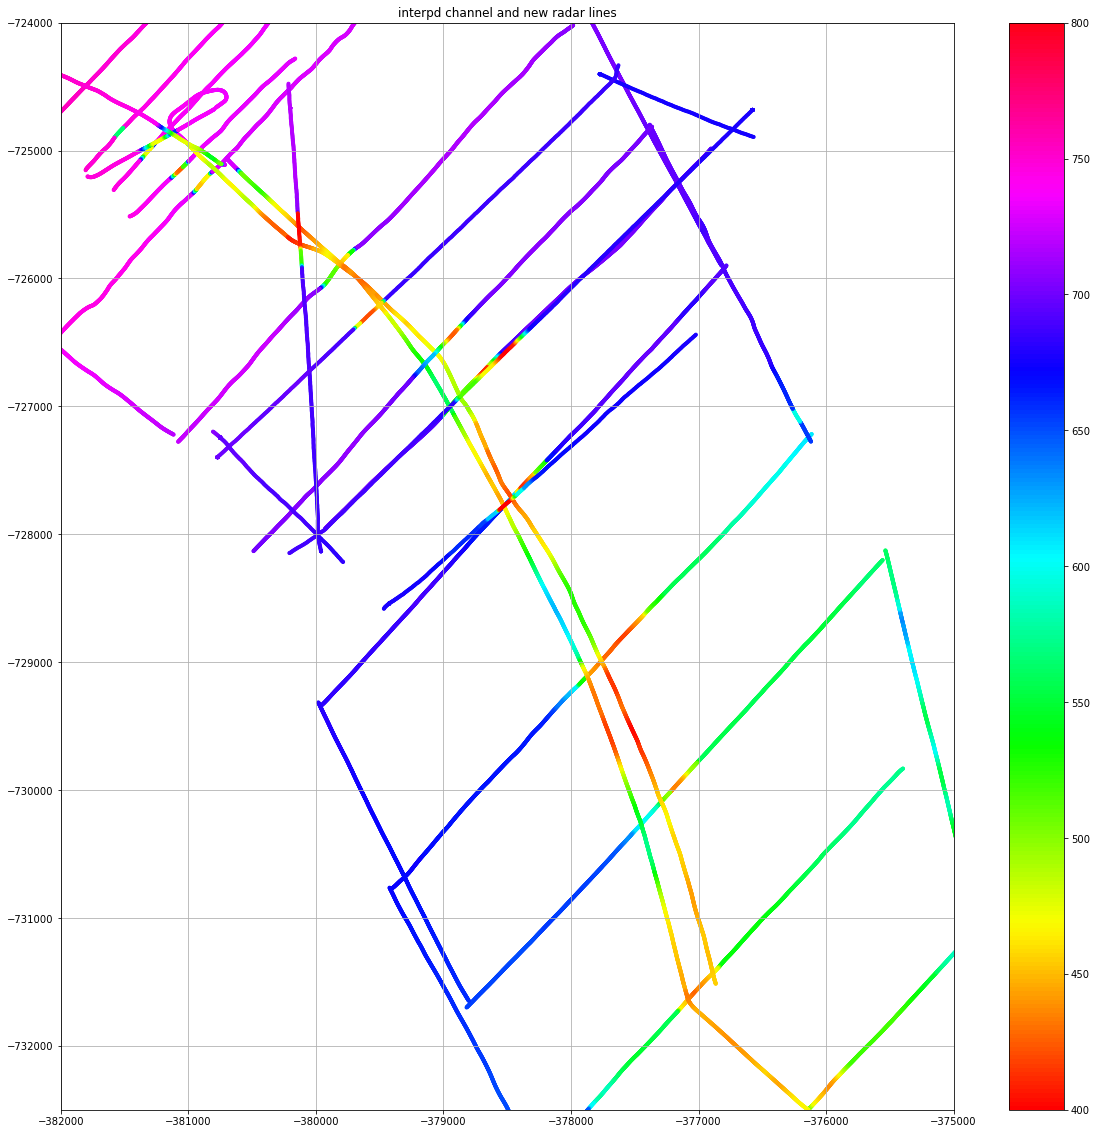

In [5]:
plt.figure(figsize=(20,20))
plt.scatter(bed_gdf.x,bed_gdf.y,c=bed_gdf.ice_thickn,cmap='hsv',vmin=400, vmax=800,marker='.')
plt.xlim([-382000, -375000])
plt.ylim([-732500,-724000])
plt.colorbar()
plt.grid()
plt.title('interpd channel and new radar lines')
plt.show()

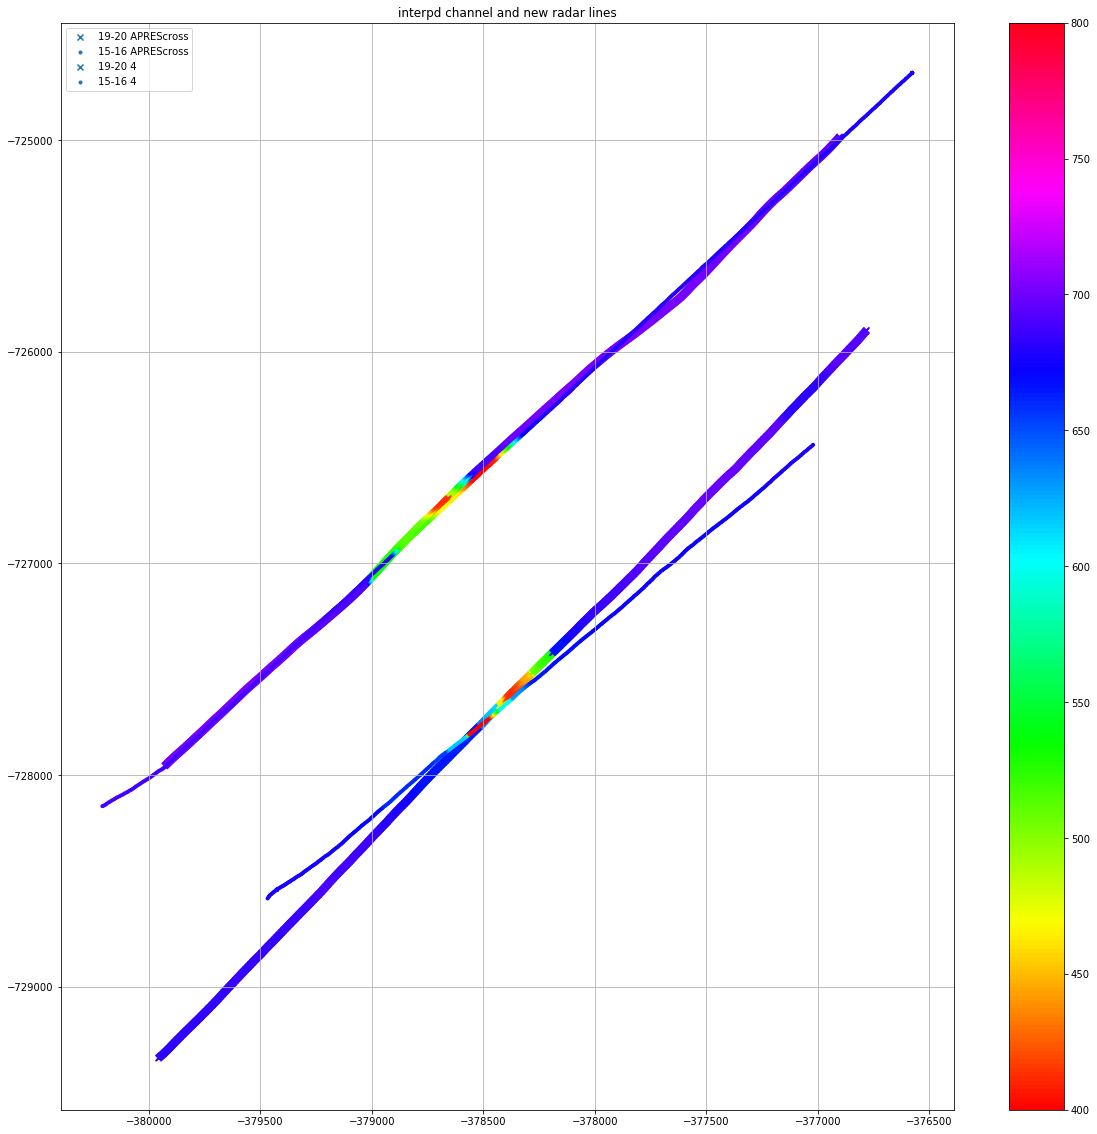

In [6]:
plt.figure(figsize=(20,20))
plt.scatter(new_gpr[new_gpr.line_name=='lineAPREScross'].x,new_gpr[new_gpr.line_name=='lineAPREScross'].y,
            c=new_gpr[new_gpr.line_name=='lineAPREScross'].ice_thickn,cmap='hsv',vmin=400, vmax=800,marker='x'
           , label = '19-20 APREScross')
plt.scatter(old_gpr[old_gpr.line_name=='lineoldAPREScross'].x,old_gpr[old_gpr.line_name=='lineoldAPREScross'].y,
            c=old_gpr[old_gpr.line_name=='lineoldAPREScross'].ice_thickn,cmap='hsv',vmin=400, vmax=800,marker='.'
           , label = '15-16 APREScross')
plt.scatter(new_gpr[new_gpr.line_name=='line4'].x,new_gpr[new_gpr.line_name=='line4'].y,
            c=new_gpr[new_gpr.line_name=='line4'].ice_thickn,cmap='hsv',vmin=400, vmax=800,marker='x'
           , label = '19-20 4')
plt.scatter(old_gpr[old_gpr.line_name=='lineold4'].x,old_gpr[old_gpr.line_name=='lineold4'].y,
            c=old_gpr[old_gpr.line_name=='lineold4'].ice_thickn,cmap='hsv',vmin=400, vmax=800,marker='.'
           , label = '15-16 4')
# plt.xlim([-382000, -375000])
# plt.ylim([-732500,-724000])
plt.legend()
plt.colorbar()
plt.grid()
plt.title('interpd channel and new radar lines')
plt.show()

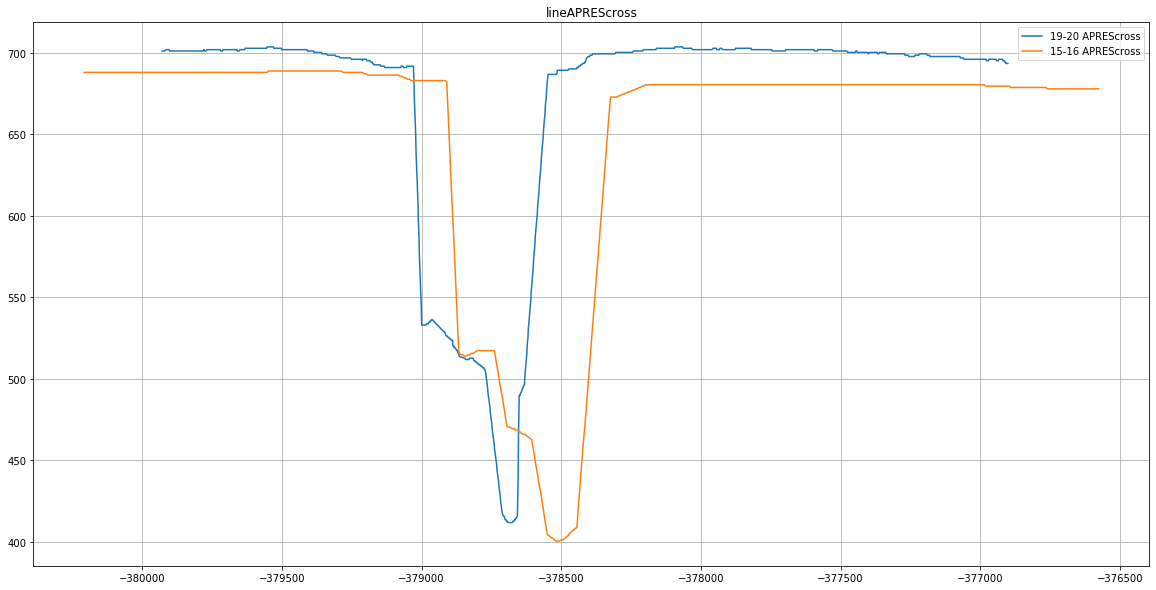

In [7]:
plt.figure(figsize=(20,10))
plt.plot(new_gpr[new_gpr.line_name=='lineAPREScross'].x,new_gpr[new_gpr.line_name=='lineAPREScross'].ice_thickn,
        label = '19-20 APREScross')
plt.plot(old_gpr[old_gpr.line_name=='lineoldAPREScross'].x,old_gpr[old_gpr.line_name=='lineoldAPREScross'].ice_thickn,
        label = '15-16 APREScross')
# plt.xlim([-382000, -375000])
# plt.ylim([-732500,-724000])
plt.legend()
plt.grid()
plt.title('lineAPREScross')
plt.show()

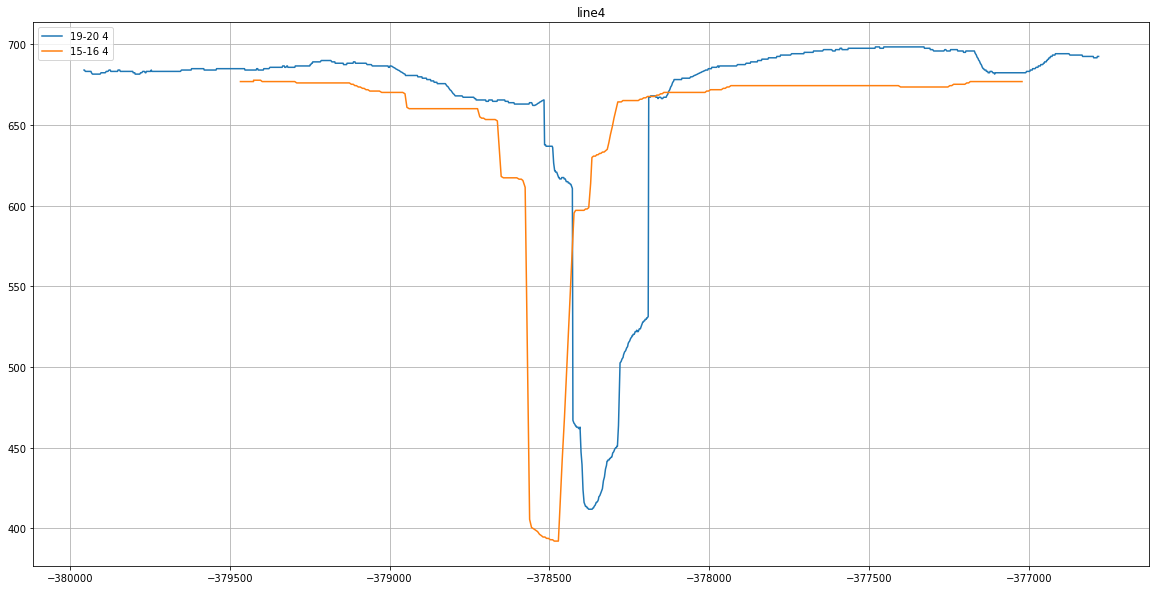

In [8]:
plt.figure(figsize=(20,10))
plt.plot(new_gpr[new_gpr.line_name=='line4'].x,new_gpr[new_gpr.line_name=='line4'].ice_thickn,
        label = '19-20 4')
plt.plot(old_gpr[old_gpr.line_name=='lineold4'].x,old_gpr[old_gpr.line_name=='lineold4'].ice_thickn,
        label = '15-16 4')
# plt.xlim([-382000, -375000])
# plt.ylim([-732500,-724000])
plt.legend()
plt.grid()
plt.title('line4')
plt.show()

## Ie it has shifted, in diff directions. It is meandering

# 2. Compare line2line interpolated surface to REMA

In [9]:
with rio.open("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/surface_line2line.tif") as image:
    extent_l2l = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
    im_l2l = image.read(1)
with rio.open('/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/SETSM_WV01_20161109_1020010058134D00_10200100576C9100_seg1_2m_v1.0_dem.tif') as image:
    extent_REMA = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
    im_REMA = image.read(1)

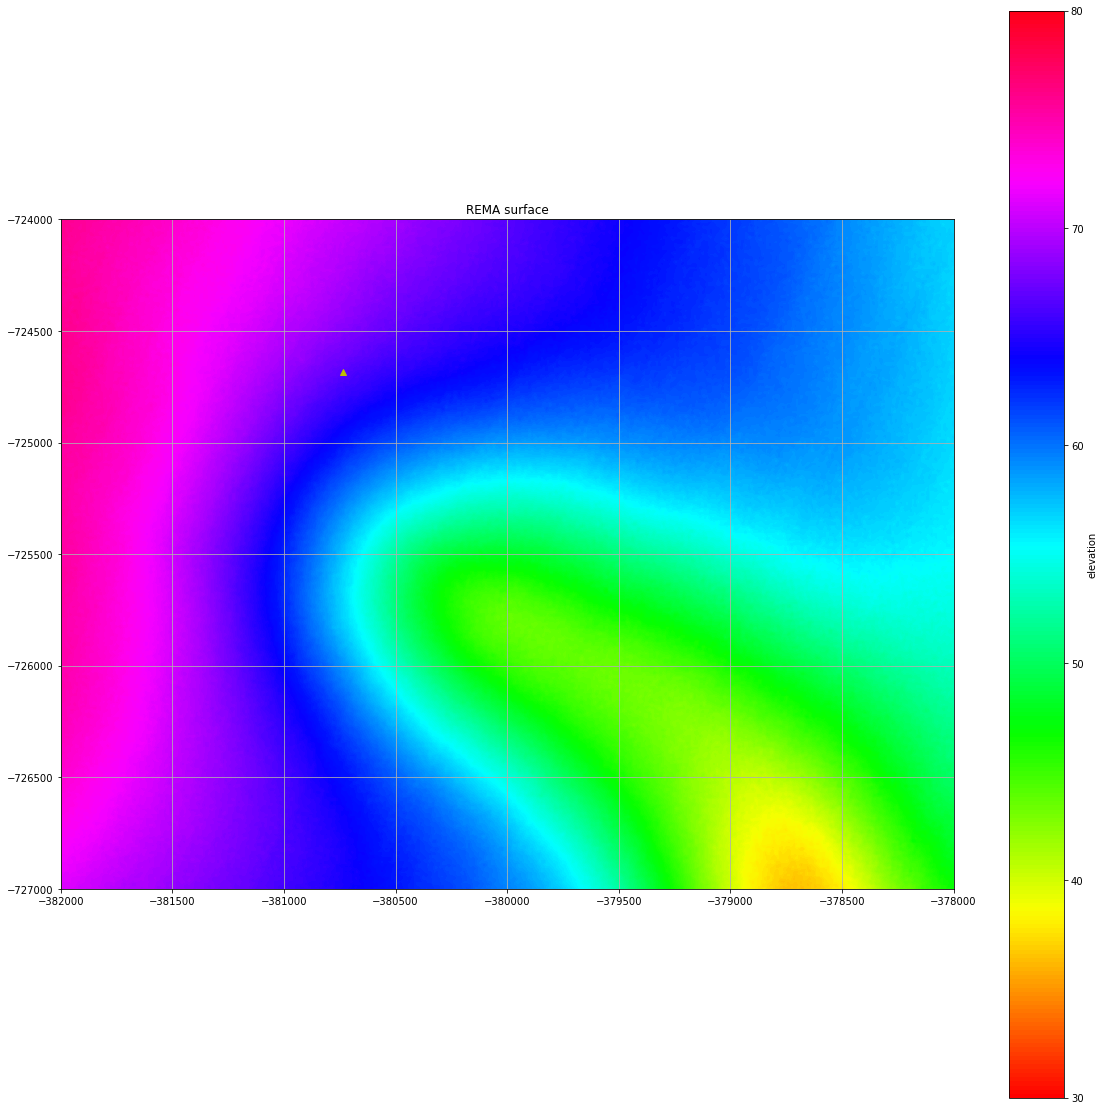

In [15]:
#rema
v=[30,80]    

extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
kis2 = [-380737.537026,-724683.311299]
plt.figure(figsize=(20,20))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im_REMA,extent=extent_REMA, vmin=v[0],vmax=v[1],cmap='hsv')
cb = plt.colorbar()
plt.plot(kis2[0],kis2[1],'y^')
cb.set_label('elevation')
plt.xlim([-382000, -378000])
plt.ylim([-727000,-724000])
plt.title('REMA surface')
plt.grid()
plt.show()

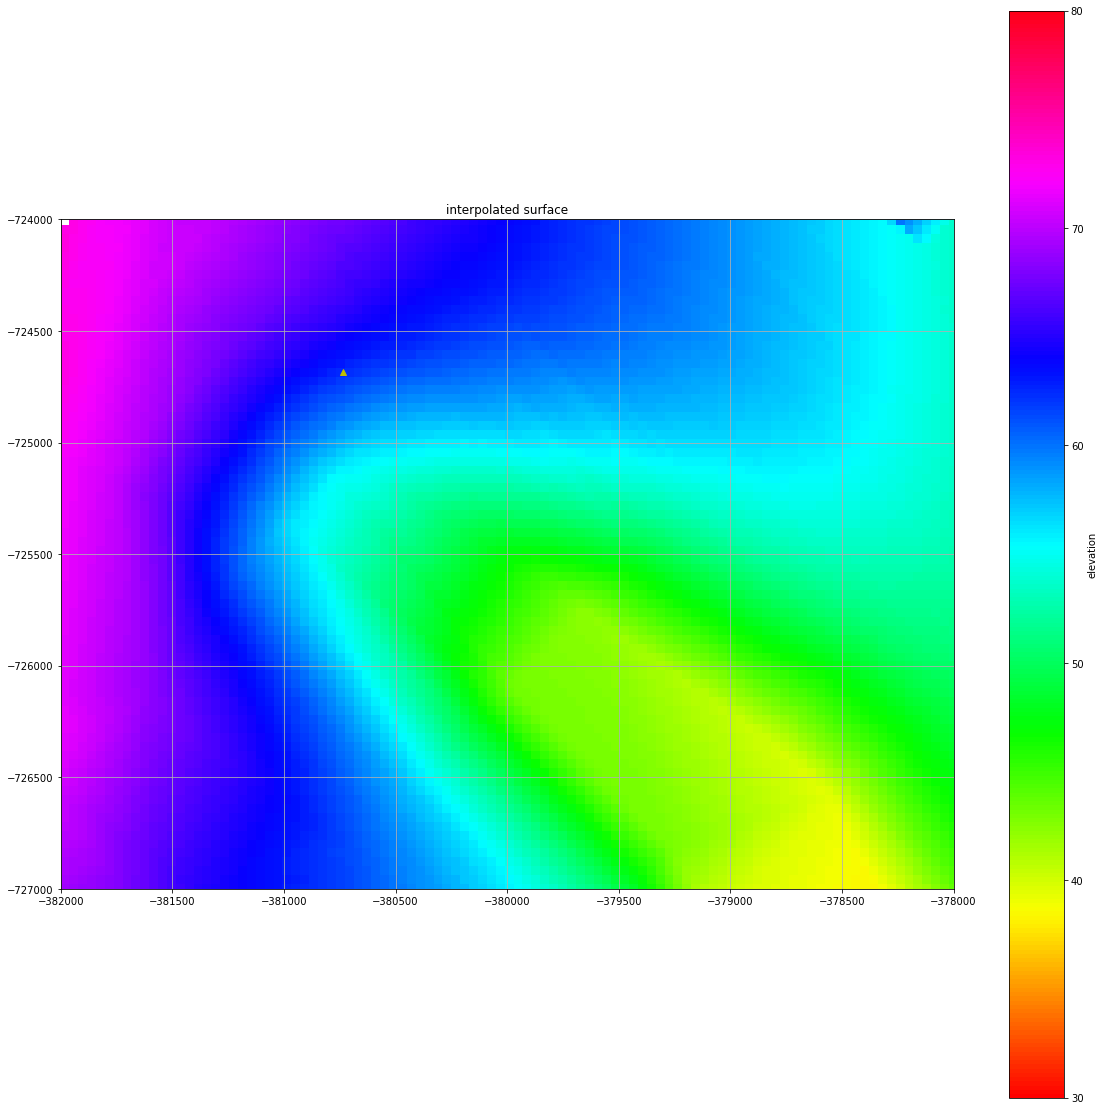

In [16]:
#rema
v=[30,80]    

extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
kis2 = [-380737.537026,-724683.311299]
plt.figure(figsize=(20,20))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im_l2l,extent=extent_l2l, vmin=v[0],vmax=v[1],cmap='hsv')
cb = plt.colorbar()
plt.plot(kis2[0],kis2[1],'y^')
cb.set_label('elevation')
plt.title('interpolated surface')
plt.xlim([-382000, -378000])
plt.ylim([-727000,-724000])
plt.grid()
plt.show()

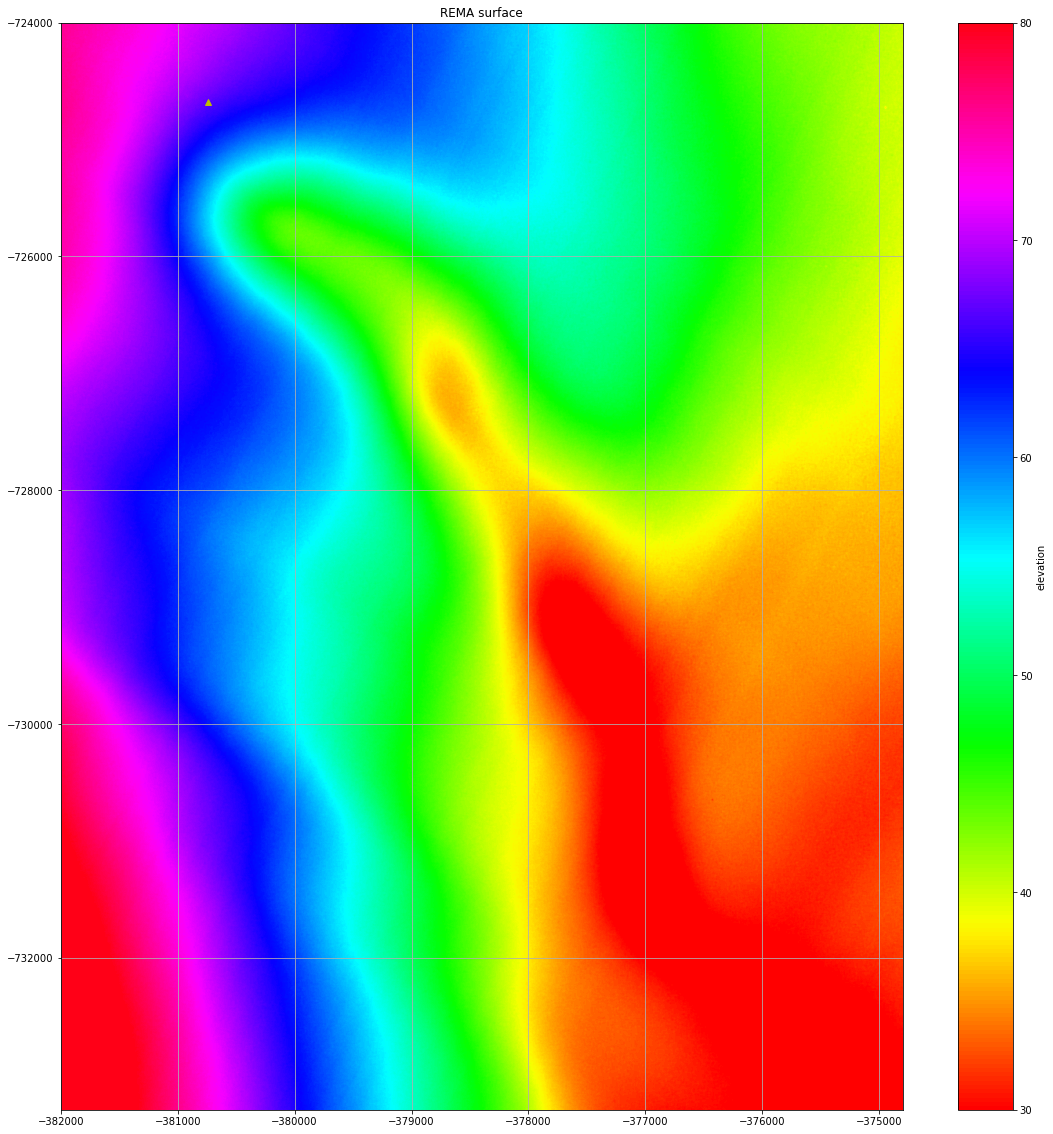

In [18]:
#rema
v=[30,80]    

extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
kis2 = [-380737.537026,-724683.311299]
plt.figure(figsize=(20,20))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im_REMA,extent=extent_REMA, vmin=v[0],vmax=v[1],cmap='hsv')
cb = plt.colorbar()
plt.plot(kis2[0],kis2[1],'y^')
cb.set_label('elevation')
plt.xlim([-382000, -374800])
plt.ylim([-733300,-724000])
plt.title('REMA surface')
plt.grid()
plt.show()

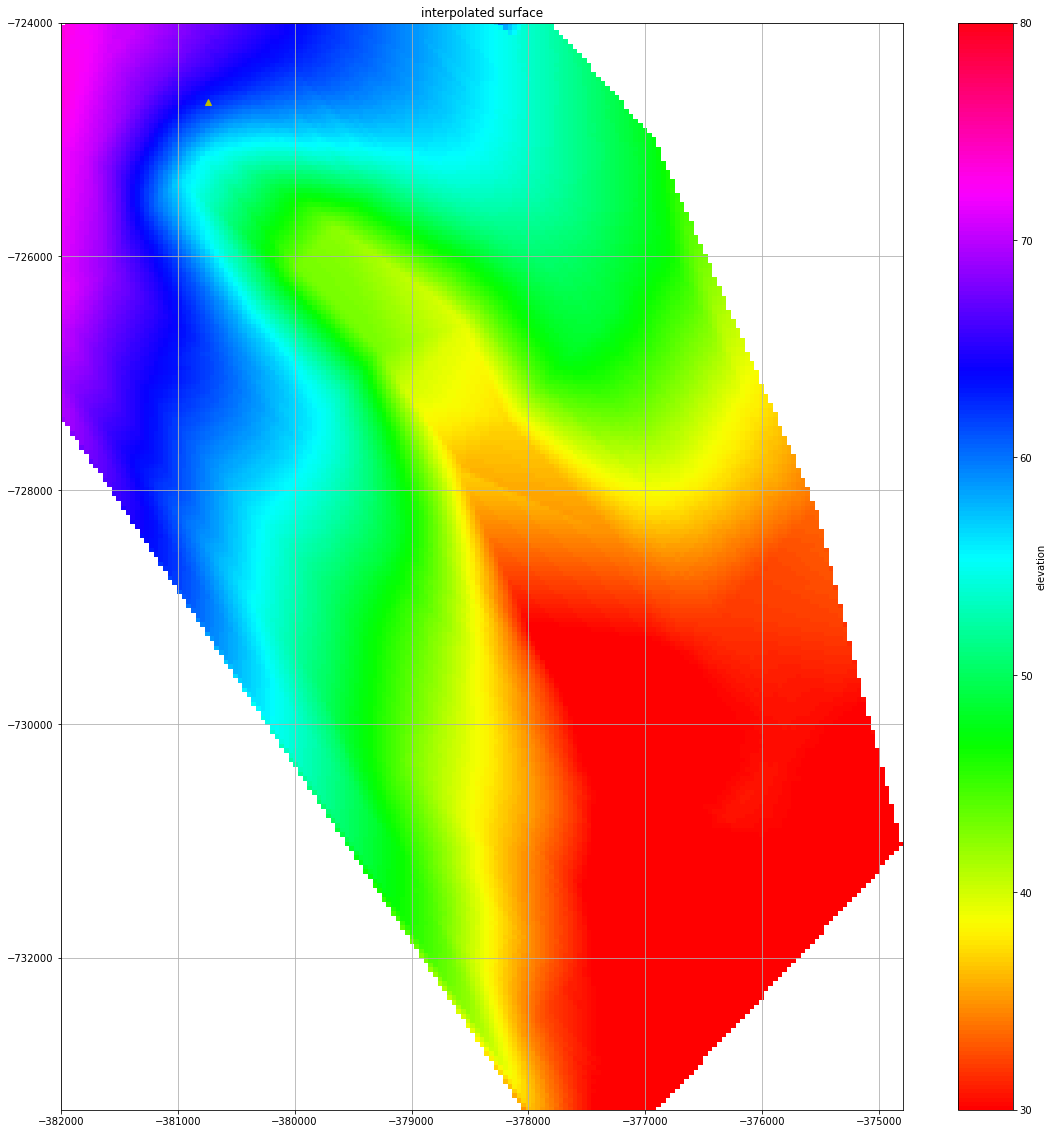

In [17]:
#rema
v=[30,80]    

extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
kis2 = [-380737.537026,-724683.311299]
plt.figure(figsize=(20,20))
GyRd = plt.cm.get_cmap('RdGy').reversed()
plt.imshow(im_l2l,extent=extent_l2l, vmin=v[0],vmax=v[1],cmap='hsv')
cb = plt.colorbar()
plt.plot(kis2[0],kis2[1],'y^')
cb.set_label('elevation')
plt.title('interpolated surface')
plt.xlim([-382000, -374800])
plt.ylim([-733300,-724000])
plt.grid()
plt.show()

## looks pretty similar over the channel

# 3. compare interpd thickness to historic lines

In [54]:
gdf = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/line2line_all_interp_points.shp')

In [55]:
gdf_hist = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/cresisplus1516Channel.shp').rename(columns={'field_1':'x','field_2':'y','field_3':'surf','field_4':'bed'}).astype({'x':'float','y':'float','surf':'float','bed':'float'})
gdf_hist['ice_thickn'] = gdf_hist.surf - gdf_hist.bed

In [56]:
gdf_hist.keys()

Index(['x', 'y', 'surf', 'bed', 'geometry', 'ice_thickn'], dtype='object')

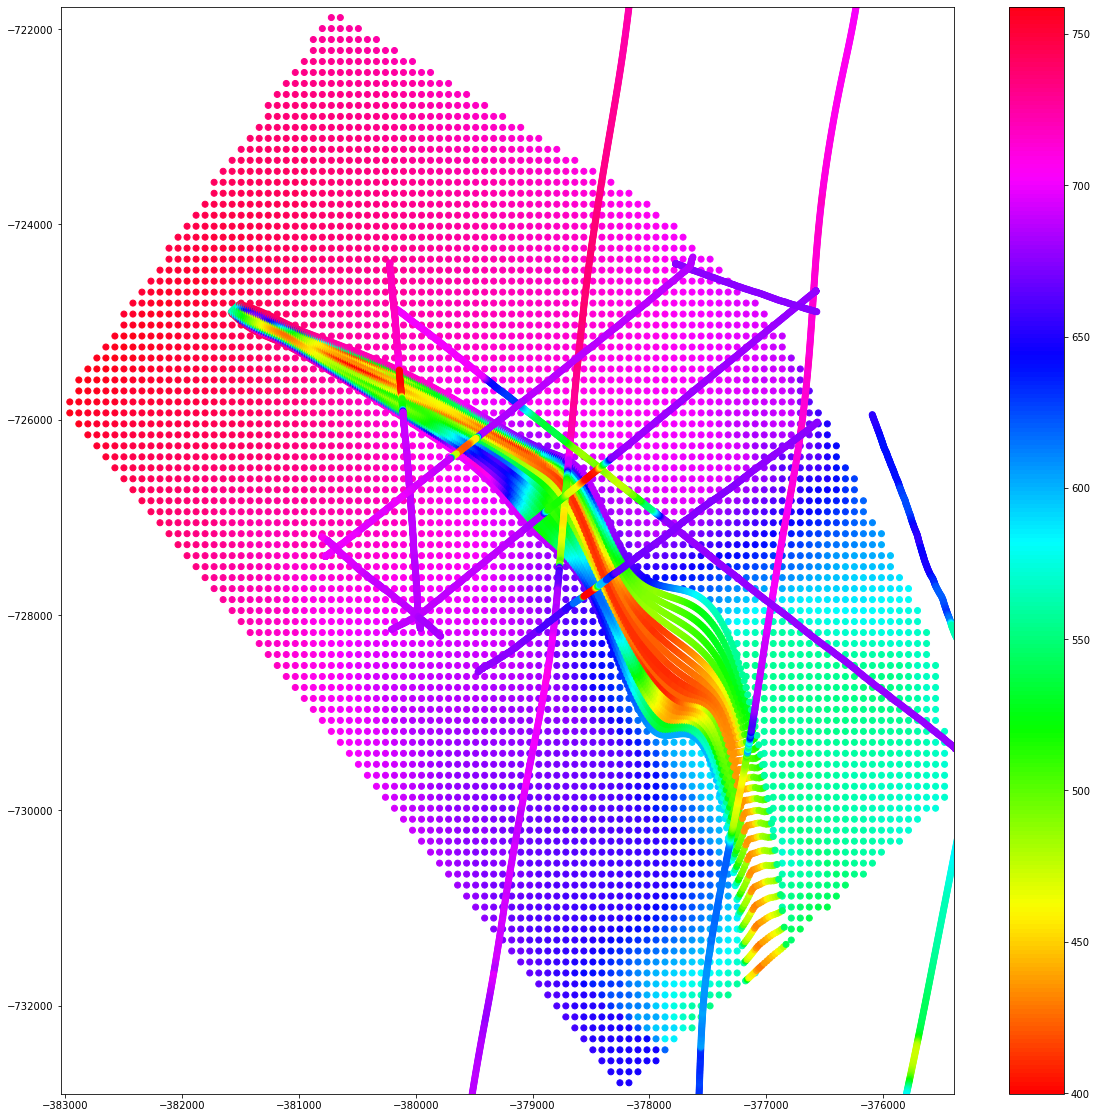

In [57]:
plt.figure(figsize=(20,20))
plt.scatter(gdf.x,gdf.y,c=gdf.ice_thickn,vmin=gdf.ice_thickn.min(),vmax=gdf.ice_thickn.max(),cmap='hsv')
plt.scatter(gdf_hist.x,gdf_hist.y,c=gdf_hist.ice_thickn,vmin=gdf.ice_thickn.min(),vmax=gdf.ice_thickn.max(),cmap='hsv')
plt.xlim([-383037.7, -375396.8])
plt.ylim([-732901.4, -721770.2])
plt.colorbar()
plt.show()

## Interestingly

The three ground radarlines are off the channel but the aero ones seem good.
Diagonal one looks good too.